In [15]:
# GitHub repo installation of paddle
!python -m pip install paddlepaddle-gpu==2.1.0 -i https://mirror.baidu.com/pypi/simple

^C


In [3]:
# Install paddle OCR
!pip install paddlepaddle

     ---------------------------------------- 68.6/68.6 MB 6.0 MB/s eta 0:00:00
     -------------------------------------- 904.1/904.1 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3


In [6]:
!pip install paddleocr

  Using cached paddleocr-2.6.1.3-py3-none-any.whl (445 kB)
  Using cached premailer-3.10.0-py2.py3-none-any.whl (19 kB)
  Using cached imgaug-0.4.0-py2.py3-none-any.whl (948 kB)
  Using cached fire-0.5.0-py2.py3-none-any.whl
  Using cached visualdl-2.5.1-py3-none-any.whl (6.3 MB)
  Using cached attrdict-2.0.1-py2.py3-none-any.whl (9.9 kB)
  Using cached pdf2docx-0.5.6-py3-none-any.whl (148 kB)
  Using cached cssutils-2.6.0-py3-none-any.whl (399 kB)
  Using cached tritonclient-2.31.0-py3-none-any.whl (67 kB)
  Using cached flask_babel-3.0.1-py3-none-any.whl (11 kB)
  Using cached x2paddle-1.4.0-py3-none-any.whl (319 kB)
  Using cached onnx-1.13.1-cp39-cp39-win_amd64.whl (12.2 MB)
  Using cached gradio-3.21.0-py3-none-any.whl (15.8 MB)
  Using cached bce_python_sdk-0.8.79-py3-none-any.whl (207 kB)
  Using cached protobuf-3.20.3-cp39-cp39-win_amd64.whl (904 kB)
  Using cached markdown_it_py-2.2.0-py3-none-any.whl (84 kB)
  Using cached mdit_py_plugins-0.3.3-py3-none-any.whl (50 kB)
  Usin

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
paddlepaddle 2.4.2 requires protobuf<=3.20.0,>=3.1.0, but you have protobuf 3.20.3 which is incompatible.


In [8]:
# Clone paddle OCR repo - get FONTS for visualization
!git clone https://github.com/PaddlePaddle/PaddleOCR #โหลด library จาก git

fatal: destination path 'PaddleOCR' already exists and is not an empty directory.


In [1]:
from paddleocr import PaddleOCR, draw_ocr # main OCR dependencies
from matplotlib import pyplot as plt # plot images
import cv2 #opencv
import os # folder directory navigation
#เป็นการ import เพื่อในไปใช้ในงานประมวลผลภาพ

In [2]:
# Setup model
ocr_model = PaddleOCR(lang='en') # โหลด Model ประมวลผลภาพ

[2023/03/18 14:43:53] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\folkf/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\folkf/.paddleocr/whl\\rec\\en\\en_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, re

In [3]:
img_path = os.path.join('.', 'IMG_20230318_144245.jpg')#โฆลดภาพที่จะนำมาหา text จากภาพ

In [4]:
# Run the ocr method on the ocr model
result = ocr_model.ocr(img_path) #นำภาพไปประมวลผล

[2023/03/18 14:43:56] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/03/18 14:43:58] ppocr DEBUG: dt_boxes num : 5, elapse : 0.8544466495513916
[2023/03/18 14:44:01] ppocr DEBUG: rec_res num  : 5, elapse : 3.6610422134399414


In [5]:
result #ผลที่ได้ โดย ในส่วนของ  ('aDUUS:nOU/INGREDIENTS:', 0.8549875020980835) ในช่อแรกคือข้อความ ช่อง 2 คือค่าความถูกต้องโดยมาค่าเต็มอยู่ที่1

[[[[[189.0, 117.0], [1547.0, 48.0], [1552.0, 144.0], [193.0, 213.0]],
   ('aDUUS:nOU/INGREDIENTS:', 0.8549875020980835)],
  [[[166.0, 270.0], [3378.0, 152.0], [3381.0, 264.0], [170.0, 382.0]],
   ('CollagenGluta,Blueberry,Sodium hydroxide,AImond oil PEG-8 esters,Olive oil,',
    0.863739013671875)],
  [[[151.0, 436.0], [3161.0, 335.0], [3164.0, 430.0], [153.0, 531.0]],
   ('Sun flower oil,Sucrose,Sorbitol, Sodium citrate,Sodium laureth-40 sulfate,',
    0.8959451913833618)],
  [[[139.0, 597.0], [3456.0, 496.0], [3459.0, 596.0], [142.0, 697.0]],
   ('CollagenAHA,Scrub beads,AGE Liquid Extract,Chili Extract,Fingerroot Extract,',
    0.9298076629638672)],
  [[[124.0, 762.0], [497.0, 762.0], [497.0, 862.0], [124.0, 862.0]],
   ('Fragrance', 0.996669352054596)]]]

In [7]:
# Extracting detected components
boxes = [res[0] for res in result[0]] # 
texts = [res[1][0] for res in result[0]]
scores = [res[1][1] for res in result[0]]

for score in scores:
    print(score) 

0.8549875020980835
0.863739013671875
0.8959451913833618
0.9298076629638672
0.996669352054596


In [9]:
# Specifying font path for draw_ocr method
font_path = os.path.join('PaddleOCR', 'doc', 'fonts', 'latin.ttf')
# Import our image - drug 1/2/3
# imports image
img = cv2.imread(img_path) 

# reorders the color channels
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
#เป็นส่วนของรูปแบบการแสดงผล

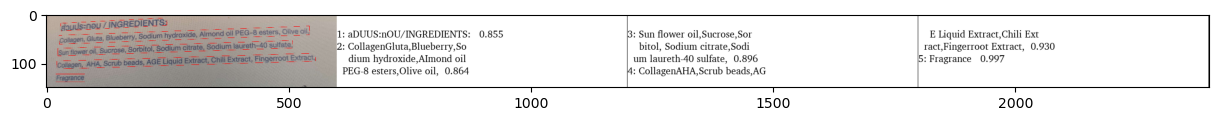

In [10]:
# Visualize our image and detections
# resizing display area
plt.figure(figsize=(15,15))

# draw annotations on image
annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path) 

# show the image using matplotlib
plt.imshow(annotated) 

#ผลที่ได้